In [20]:
import numpy as np
import pandas as pd
import bokeh
import bokeh.plotting as bp
import bokeh.io as bi
import bokeh.models as bm
import matplotlib.pyplot as plt
import datetime
import itertools
import bokeh.palettes

In [5]:
df_c = pd.read_csv('us-counties.csv')
df_s = pd.read_csv('us-states.csv')

df_s = df_s[df_s['cases']>100]
df_s = df_s.head(500)

In [6]:
def parse_dates(date_str):
    year, month, date = [int(n) for n in date_str.split('-')]
    date_num = datetime.date(year, month, date).toordinal()
    
    return date_num

In [7]:
df_s['date_num'] = df_s['date'].apply(parse_dates)

In [8]:
df_s['date_type'] = pd.to_datetime(df_s['date'])

In [9]:
df_s.head()

,date,state,fips,cases,deaths,date_num,date_type
381,2020-03-07,Washington,53,110,16,737491,2020-03-07
384,2020-03-08,California,6,112,1,737492,2020-03-08
404,2020-03-08,New York,36,106,0,737492,2020-03-08
416,2020-03-08,Washington,53,141,19,737492,2020-03-08
419,2020-03-09,California,6,172,2,737493,2020-03-09


In [10]:
df_s[df_s['state']=='Alabama']

,date,state,fips,cases,deaths,date_num,date_type
957,2020-03-20,Alabama,1,106,0,737504,2020-03-20
1011,2020-03-21,Alabama,1,131,0,737505,2020-03-21
1065,2020-03-22,Alabama,1,157,0,737506,2020-03-22
1119,2020-03-23,Alabama,1,196,0,737507,2020-03-23
1173,2020-03-24,Alabama,1,242,0,737508,2020-03-24
1227,2020-03-25,Alabama,1,386,1,737509,2020-03-25


In [11]:
df = df_s[df_s['state'] < 'As']

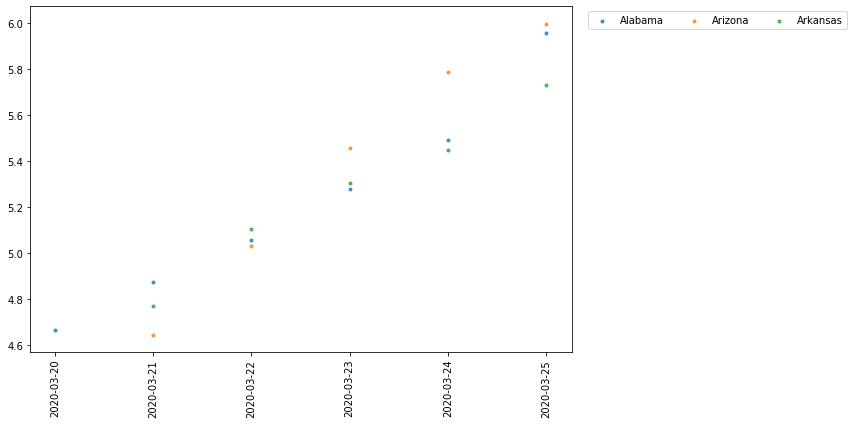

In [12]:
f, a = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90)

for (loc, group) in df.groupby(['state']):
    a.scatter(group['date'],group['cases'].apply(np.log), label=loc, alpha=0.75, marker='.')

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, ncol=3)
plt.tight_layout()
#plt.savefig('output.png')


In [13]:
palette40 = bokeh.palettes.d3['Category20b'][20] + bokeh.palettes.d3['Category20c'][20]
palette50 = bokeh.palettes.d3['Category20b'][20] + bokeh.palettes.d3['Category20c'][20] + bokeh.palettes.d3['Category10'][10]

In [27]:
p = bp.figure(plot_width = 600, plot_height = 600, 
           title = 'Coronavirus Cases Over Time by State',
           x_axis_label = 'Date', y_axis_label = 'Number of Cases', x_axis_type="datetime")

colors = itertools.cycle(palette50)

for (loc, group) in df_s.groupby(['state']):
    p.line(group['date_type'],group['cases'], 
               alpha=0.8, legend=loc, color=next(colors), line_width=3,
               muted_alpha=0.2,
               selection_color="black",
               selection_alpha=1,
               nonselection_alpha=0.2,
               nonselection_color="blue")

p.legend.location = (10,25)#"top_left"
p.legend.click_policy="mute"
p.legend.label_text_font_size = '8pt'
p.legend.spacing = -9

p.toolbar.autohide = True
bi.output_notebook()
bi.show(p)

Loading BokehJS ...

In [22]:
p = bp.figure(plot_width = 600, plot_height = 600, 
           title = 'Coronavirus Cases Over Time by State',
           x_axis_label = 'Date', y_axis_label = 'Number of Cases', x_axis_type="datetime")

colors = itertools.cycle(palette50)


p.multi_line('date_type','cases', 
               alpha=0.8, legend='state', color=next(colors), line_width=3,
               muted_alpha=0.2, source = ColumnDataSource(df_s))

p.legend.location = (10,25)#"top_left"
p.legend.click_policy="mute"
p.legend.label_text_font_size = '8pt'
p.legend.spacing = -9

#bp.toolbar.autohide = True
bi.output_notebook()
bi.show(p)

Loading BokehJS ...

In [16]:
p = bp.figure(plot_width = 600, plot_height = 600, tools="tap",
           title = 'Coronavirus Cases Over Time by State',
           x_axis_label = 'Date', y_axis_label = 'Number of Cases', x_axis_type="datetime")

colors = itertools.cycle(palette50)

for (loc, group) in df_s[df_s['state']<'B'].groupby(['state']):
    rend = p.circle(group['date_type'],group['cases'], 
               alpha=0.8, legend=loc, color=next(colors), size=10, #line_width=3,
               muted_alpha=0.2,
               selection_color="black",
               selection_alpha=1,
               nonselection_fill_alpha=0.2,
               nonselection_fill_color="blue")

# from bokeh.models import CheckboxButtonGroup

# output_file("checkbox_button_group.html")

# checkbox_button_group = CheckboxButtonGroup(
#         labels=["Option 1", "Option 2", "Option 3"], active=[0, 1])

# show(checkbox_button_group)

p.legend.location = (10,25)#"top_left"
p.legend.click_policy="mute"
p.legend.label_text_font_size = '8pt'
p.legend.spacing = -9

#bp.toolbar.autohide = True
bi.output_notebook()
bi.show(p)

Loading BokehJS ...